In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_valid, x_train = x_train[:5000]/255.0, x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", 
           "Dress", "Coat", "Sandal", "Shirt", 
           "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9818 - accuracy: 0.6848 - val_loss: 0.5042 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5046 - accuracy: 0.8232 - val_loss: 0.4505 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4472 - accuracy: 0.8442 - val_loss: 0.4304 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4192 - accuracy: 0.8538 - val_loss: 0.4024 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4030 - accuracy: 0.8585 - val_loss: 0.3996 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3815 - accuracy: 0.8642 - val_loss: 0.4221 - val_accuracy: 0.8510
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8689 - val_loss: 0.3847 - val_accuracy:

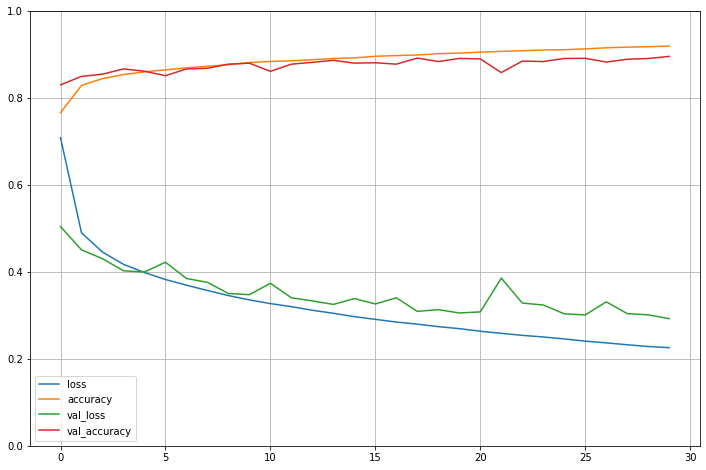

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
import numpy as np
x_new = x_test[:3]
y_pred = model.predict_classes(x_new)
print(y_pred)
print(np.array(classes)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
